In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
import time
start_time = time.time()



train_df = pd.read_csv('mnist-in-csv/mnist_train.csv')
train_df = train_df.sample(n=10000)

X_tr = train_df.values[:, 1:].astype(float)
Y_tr = train_df.values[:, 0]

print('Training model.')
params = {'hidden_layer_sizes': [(256,), (512,), (128, 256, 128,)]}
# params = {'hidden_layer_sizes': [ (512,)]}
mlp = MLPClassifier(verbose=10, learning_rate='adaptive', activation='relu')
clf = GridSearchCV(mlp, params, verbose=10, n_jobs=-1, cv=3)
clf.fit(X_tr, Y_tr)
print('Finished with grid search with best mean cross-validated score:', clf.best_score_)
print('Best params appeared to be', clf.best_params_)


/Users/gali/anaconda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training model.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 5.74157648
Iteration 1, loss = 5.52477742
Iteration 1, loss = 5.86716879
Iteration 2, loss = 1.60891849
Iteration 2, loss = 1.45880659
Iteration 2, loss = 1.59735017
Iteration 3, loss = 0.90553219
Iteration 3, loss = 0.97350083
Iteration 3, loss = 1.01143691
Iteration 4, loss = 0.50014538
Iteration 4, loss = 0.69764231
Iteration 4, loss = 0.68253949
Iteration 5, loss = 0.31780943
Iteration 5, loss = 0.31881031
Iteration 5, loss = 0.39099178
Iteration 6, loss = 0.30397658
Iteration 6, loss = 0.27150284
Iteration 6, loss = 0.19654305
Iteration 7, loss = 0.17526705
Iteration 7, loss = 0.18034164
Iteration 7, loss = 0.18916159
Iteration 8, loss = 0.09964926
Iteration 8, loss = 0.11343862

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.3s finished


Iteration 1, loss = 4.63283005
Iteration 2, loss = 1.36829013
Iteration 3, loss = 0.78835503
Iteration 4, loss = 0.48907395
Iteration 5, loss = 0.31523819
Iteration 6, loss = 0.20230391
Iteration 7, loss = 0.17212219
Iteration 8, loss = 0.15166916
Iteration 9, loss = 0.13503197
Iteration 10, loss = 0.10939742
Iteration 11, loss = 0.09189642
Iteration 12, loss = 0.08008429
Iteration 13, loss = 0.06896513
Iteration 14, loss = 0.11078815
Iteration 15, loss = 0.23888517
Iteration 16, loss = 0.16567046
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Finished with grid search with best mean cross-validated score: 0.9249
Best params appeared to be {'hidden_layer_sizes': (512,)}


In [2]:


import matplotlib.pyplot as pt



test_df = pd.read_csv('mnist-in-csv/mnist_test.csv')
test_df = test_df.sample(n=5000)
X_test = test_df.values[:,1:].astype(float)
Y_test = test_df.values[:,0]

d = X_test[4]
d.shape=(28,28)
pt.imshow(255-d,cmap='gray')
pt.show();

# make predictions
prediction = clf.predict(X_test)
print(prediction[4])

print('Test accuracy:', clf.score(X_test, Y_test))




<Figure size 640x480 with 1 Axes>

7
Test accuracy: 0.9364


In [3]:
# Calculating F1 score
from sklearn.metrics import f1_score
print(f1_score(test_df.values[:,0], prediction, average='macro'))
print(f1_score(test_df.values[:,0], prediction, average='micro'))
print(f1_score(test_df.values[:,0], prediction, average='weighted'))

0.935682808379
0.9364
0.93623568413


Confusion matrix, without normalization
Normalized confusion matrix


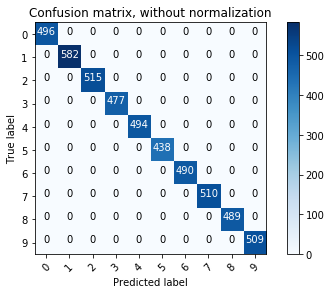

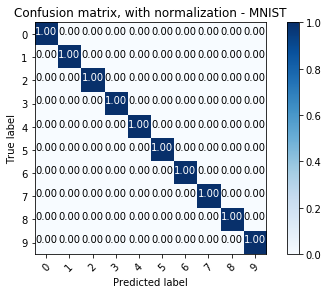

In [6]:
# Plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    pt.imshow(cm, interpolation='nearest', cmap=cmap)
    pt.title(title)
    pt.colorbar()
    tick_marks = np.arange(len(classes))
    pt.xticks(tick_marks, classes, rotation=45)
    pt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pt.tight_layout()
    pt.ylabel('True label')
    pt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(test_df.values[:,0], Y_test)
pt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')
pt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9],normalize=True,
                      title='Confusion matrix, with normalization - MNIST')
pt.show()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 16.92352267
Iteration 1, loss = 17.96702425
Iteration 1, loss = 18.12905778
Iteration 2, loss = 7.63914126
Iteration 2, loss = 7.32386304
Iteration 2, loss = 7.96812530
Iteration 3, loss = 4.42169416
Iteration 3, loss = 4.31567012
Iteration 3, loss = 5.21884535
Iteration 4, loss = 2.39128876
Iteration 4, loss = 2.38283129
Iteration 4, loss = 2.78550430
Iteration 5, loss = 2.31955865
Iteration 5, loss = 2.45184366
Iteration 5, loss = 2.38226724
Iteration 6, loss = 1.69582942
Iteration 6, loss = 1.93195035
Iteration 6, loss = 2.17702002
Iteration 7, loss = 0.56194564
Iteration 7, loss = 0.93814874
Iteration 7, loss = 0.75675663
Iteration 8, loss = 0.19523069
Iteration 8, loss = 0.51972111
Iteration 8,

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


Iteration 1, loss = 15.94322457
Iteration 2, loss = 5.71101291
Iteration 3, loss = 3.83069756
Iteration 4, loss = 2.91326598
Iteration 5, loss = 2.48845697
Iteration 6, loss = 1.12945703
Iteration 7, loss = 0.73692028
Iteration 8, loss = 0.49601502
Iteration 9, loss = 0.26180431
Iteration 10, loss = 0.05789678
Iteration 11, loss = 0.00050509
Iteration 12, loss = 0.05759592
Iteration 13, loss = 0.00016564
Iteration 14, loss = 0.00517393
Iteration 15, loss = 0.00022509
Iteration 16, loss = 0.00014178
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 11.28250164
Iteration 1, loss = 11.63088703
Iteration 1, loss = 11.03180922
Iteration 2, loss = 3.48590587
Iterat

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s finished


Iteration 1, loss = 9.62334928
Iteration 2, loss = 2.84128149
Iteration 3, loss = 1.54709655
Iteration 4, loss = 0.82250081
Iteration 5, loss = 0.46001923
Iteration 6, loss = 0.28094159
Iteration 7, loss = 0.13202077
Iteration 8, loss = 0.07996771
Iteration 9, loss = 0.05010288
Iteration 10, loss = 0.01132539
Iteration 11, loss = 0.01526160
Iteration 12, loss = 0.07407226
Iteration 13, loss = 0.05324108
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 8.37284171
Iteration 1, loss = 8.24736544
Iteration 1, loss = 8.25276500
Iteration 2, loss = 2.21259776
Iteration 2, loss = 2.42457179
Iteration 2, loss = 2.13393235
Iteration 3, loss = 1.17382392
Iteration 3, 

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s finished


Iteration 1, loss = 6.96180676
Iteration 2, loss = 1.95239207
Iteration 3, loss = 1.06547769
Iteration 4, loss = 0.66383272
Iteration 5, loss = 0.34121176
Iteration 6, loss = 0.19475988
Iteration 7, loss = 0.12298008
Iteration 8, loss = 0.10929551
Iteration 9, loss = 0.10028739
Iteration 10, loss = 0.08898914
Iteration 11, loss = 0.05373464
Iteration 12, loss = 0.13095246
Iteration 13, loss = 0.24603502
Iteration 14, loss = 0.17517911
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 6.77804561
Iteration 1, loss = 6.74145568
Iteration 1, loss = 6.39271391
Iteration 2, loss = 2.07292655
Iteration 2, loss = 1.91228522
Iteration 2, loss = 1.91880788
Iteration 3,

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.4s finished


Iteration 1, loss = 5.31095112
Iteration 2, loss = 1.53086214
Iteration 3, loss = 0.97492768
Iteration 4, loss = 0.52882648
Iteration 5, loss = 0.24800423
Iteration 6, loss = 0.28446958
Iteration 7, loss = 0.24133912
Iteration 8, loss = 0.22589944
Iteration 9, loss = 0.15737745
Iteration 10, loss = 0.10136463
Iteration 11, loss = 0.07506093
Iteration 12, loss = 0.05399840
Iteration 13, loss = 0.03978718
Iteration 14, loss = 0.08695471
Iteration 15, loss = 0.10500566
Iteration 16, loss = 0.08075972
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 6.54015456
Iteration 1, loss = 6.32280881
Iteration 1, loss = 6.84177374
Iteration 2, loss = 1.88054618
Iteration 

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.8s finished


Iteration 1, loss = 5.32896969
Iteration 2, loss = 1.59027612
Iteration 3, loss = 0.92445348
Iteration 4, loss = 0.52914938
Iteration 5, loss = 0.36761269
Iteration 6, loss = 0.24501355
Iteration 7, loss = 0.17039055
Iteration 8, loss = 0.13952513
Iteration 9, loss = 0.12309606
Iteration 10, loss = 0.10224638
Iteration 11, loss = 0.12626166
Iteration 12, loss = 0.10496742
Iteration 13, loss = 0.07407639
Iteration 14, loss = 0.15227420
Iteration 15, loss = 0.12755218
Iteration 16, loss = 0.12097299
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 18.46165336
Iteration 1, loss = 18.11095585
Iteration 1, loss = 18.46257441
Iteration 2, loss = 7.52792936
Iterati

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


Iteration 1, loss = 16.79095301
Iteration 2, loss = 5.49789511
Iteration 3, loss = 3.10002320
Iteration 4, loss = 2.05838766
Iteration 5, loss = 1.29447560
Iteration 6, loss = 0.70642855
Iteration 7, loss = 0.34813604
Iteration 8, loss = 0.22141966
Iteration 9, loss = 0.11230869
Iteration 10, loss = 0.05247080
Iteration 11, loss = 0.03182695
Iteration 12, loss = 0.00803704
Iteration 13, loss = 0.00485837
Iteration 14, loss = 0.00030362
Iteration 15, loss = 0.00042238
Iteration 16, loss = 0.00076632
Iteration 17, loss = 0.00050410
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 10.85479836
Iteration 1, loss = 11.17017664
Iteration 1, loss = 10.80794598
Itera

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s finished


Iteration 1, loss = 9.31230158
Iteration 2, loss = 2.67518093
Iteration 3, loss = 1.50515086
Iteration 4, loss = 1.01631498
Iteration 5, loss = 0.48990121
Iteration 6, loss = 0.18080852
Iteration 7, loss = 0.16189110
Iteration 8, loss = 0.06013310
Iteration 9, loss = 0.03799981
Iteration 10, loss = 0.00881056
Iteration 11, loss = 0.00307142
Iteration 12, loss = 0.00751244
Iteration 13, loss = 0.00864884
Iteration 14, loss = 0.00743457
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 7.95609688
Iteration 1, loss = 7.81693843
Iteration 1, loss = 7.97730481
Iteration 2, loss = 2.35348204
Iteration 2, loss = 2.28108259
Iteration 2, loss = 2.35833606
Iteration 3,

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.5s finished


Iteration 1, loss = 6.88506930
Iteration 2, loss = 1.91865981
Iteration 3, loss = 1.12372651
Iteration 4, loss = 0.61702846
Iteration 5, loss = 0.34352777
Iteration 6, loss = 0.19632372
Iteration 7, loss = 0.11483500
Iteration 8, loss = 0.09255503
Iteration 9, loss = 0.06355020
Iteration 10, loss = 0.07342234
Iteration 11, loss = 0.08463929
Iteration 12, loss = 0.06281984
Iteration 13, loss = 0.02271099
Iteration 14, loss = 0.02706420
Iteration 15, loss = 0.02914969
Iteration 16, loss = 0.03431519
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 7.43414986
Iteration 1, loss = 7.30291119
Iteration 1, loss = 7.18858765
Iteration 2, loss = 1.99123300
Iteration 

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.3s finished


Iteration 1, loss = 6.08709608
Iteration 2, loss = 1.70495918
Iteration 3, loss = 0.89670134
Iteration 4, loss = 0.52243649
Iteration 5, loss = 0.25534613
Iteration 6, loss = 0.18724231
Iteration 7, loss = 0.13113434
Iteration 8, loss = 0.11435553
Iteration 9, loss = 0.06868369
Iteration 10, loss = 0.06938750
Iteration 11, loss = 0.10904539
Iteration 12, loss = 0.13928807
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 5.50257462
Iteration 1, loss = 5.50199752
Iteration 1, loss = 5.40681230
Iteration 2, loss = 1.65638444
Iteration 2, loss = 1.62342538
Iteration 2, loss = 1.70241036
Iteration 3, loss = 0.94449579
Iteration 3, loss = 0.82238205
Iteration 3, l

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.9s finished


Iteration 1, loss = 4.38362509
Iteration 2, loss = 1.34979931
Iteration 3, loss = 0.79815412
Iteration 4, loss = 0.54350188
Iteration 5, loss = 0.36080144
Iteration 6, loss = 0.28767535
Iteration 7, loss = 0.23449371
Iteration 8, loss = 0.15819038
Iteration 9, loss = 0.11834426
Iteration 10, loss = 0.11216519
Iteration 11, loss = 0.07264776
Iteration 12, loss = 0.07122474
Iteration 13, loss = 0.10497151
Iteration 14, loss = 0.14940314
Iteration 15, loss = 0.13111819
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 18.99462694
Iteration 1, loss = 18.36674665
Iteration 1, loss = 18.18483753
Iteration 2, loss = 10.03564391
Iteration 2, loss = 9.99272318
Iterati

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


Iteration 1, loss = 16.83081252
Iteration 2, loss = 6.80028603
Iteration 3, loss = 4.23937214
Iteration 4, loss = 2.83280812
Iteration 5, loss = 1.78691084
Iteration 6, loss = 1.19024859
Iteration 7, loss = 0.78812093
Iteration 8, loss = 0.23579553
Iteration 9, loss = 0.12038770
Iteration 10, loss = 0.06340046
Iteration 11, loss = 0.01556393
Iteration 12, loss = 0.00168996
Iteration 13, loss = 0.00071969
Iteration 14, loss = 0.00102688
Iteration 15, loss = 0.00019289
Iteration 16, loss = 0.00018238
Iteration 17, loss = 0.00015082
Iteration 18, loss = 0.00014366
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 10.91326450
Iteration 1, loss = 10.44306372
Itera

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.9s finished


Iteration 1, loss = 8.33751357
Iteration 2, loss = 2.44152259
Iteration 3, loss = 1.43517081
Iteration 4, loss = 0.75244831
Iteration 5, loss = 0.41810326
Iteration 6, loss = 0.20027697
Iteration 7, loss = 0.07136974
Iteration 8, loss = 0.01719877
Iteration 9, loss = 0.03901459
Iteration 10, loss = 0.00246084
Iteration 11, loss = 0.00647610
Iteration 12, loss = 0.00446398
Iteration 13, loss = 0.01660455
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 9.20467497
Iteration 1, loss = 8.67325066
Iteration 1, loss = 9.07523987
Iteration 2, loss = 2.74778205
Iteration 2, loss = 2.73402215
Iteration 2, loss = 2.92265599
Iteration 3, loss = 1.54451975
Iteration 3, 

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.5s finished


Iteration 1, loss = 7.17580074
Iteration 2, loss = 2.02070228
Iteration 3, loss = 1.33251966
Iteration 4, loss = 0.71661914
Iteration 5, loss = 0.38440155
Iteration 6, loss = 0.19550009
Iteration 7, loss = 0.09973595
Iteration 8, loss = 0.09378087
Iteration 9, loss = 0.11489045
Iteration 10, loss = 0.10766212
Iteration 11, loss = 0.11555892
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 7.35521123
Iteration 1, loss = 7.42069940
Iteration 1, loss = 7.29474498
Iteration 2, loss = 2.02771940
Iteration 2, loss = 2.21109152
Iteration 2, loss = 2.05277221
Iteration 3, loss = 1.09167698
Iteration 3, loss = 1.18814366
Iteration 3, loss = 1.16460151
Iteration 4, lo

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.5s finished


Iteration 1, loss = 5.68365047
Iteration 2, loss = 1.73440903
Iteration 3, loss = 0.98488271
Iteration 4, loss = 0.52703939
Iteration 5, loss = 0.40203955
Iteration 6, loss = 0.23748694
Iteration 7, loss = 0.15156135
Iteration 8, loss = 0.12483629
Iteration 9, loss = 0.08192630
Iteration 10, loss = 0.06308156
Iteration 11, loss = 0.05903713
Iteration 12, loss = 0.07908490
Iteration 13, loss = 0.10212988
Iteration 14, loss = 0.07287938
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
[CV] hidden_layer_sizes=(512,) .......................................
Iteration 1, loss = 6.13217951
Iteration 1, loss = 5.66753151
Iteration 1, loss = 6.11521841
Iteration 2, loss = 1.74376951
Iteration 2, loss = 1.75268153
Iteration 2, loss = 1.80771813
Iteration 3,

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.4s finished


Iteration 1, loss = 4.87052761
Iteration 2, loss = 1.46860695
Iteration 3, loss = 0.83117738
Iteration 4, loss = 0.46641989
Iteration 5, loss = 0.31541149
Iteration 6, loss = 0.21565402
Iteration 7, loss = 0.15023628
Iteration 8, loss = 0.09151448
Iteration 9, loss = 0.11896796
Iteration 10, loss = 0.11224418
Iteration 11, loss = 0.12812787
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


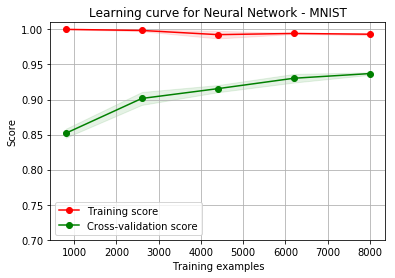

In [5]:
# Generate learning curve plot

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    pt.figure()
    pt.title(title)
    if ylim is not None:
        pt.ylim(*ylim)
    pt.xlabel("Training examples")
    pt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
   
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    pt.grid()

    pt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    pt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    pt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    pt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    pt.legend(loc="best")
    return pt
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)


plot_learning_curve(clf, "Learning curve for Neural Network - MNIST", X_tr, Y_tr, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

pt.show()